In [ ]:
import comtradeapicall 
import sys
sys.path.append("..")

import pandas as pd
from macroquant.dataapi.mq_comtrade import MQ_COMTRADE
from macroquant.utils.util_plot import *
from macroquant.utils.common import *

subscription_key = ''
comTrade= MQ_COMTRADE(subscription_key)
print("从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网")

从UN comTrade 获取数据比较缓慢，请耐心等待，如果无法访问，请考虑科学上网


In [2]:
WorldCode = '0'
CHNCode= '156'
USACode= '842'

years = [2020,2021,2022,2023]

中国->美国 中国每月出口额 和占总出口额的比例
中国->美国 美国每月进口额 和占总进口额的比例


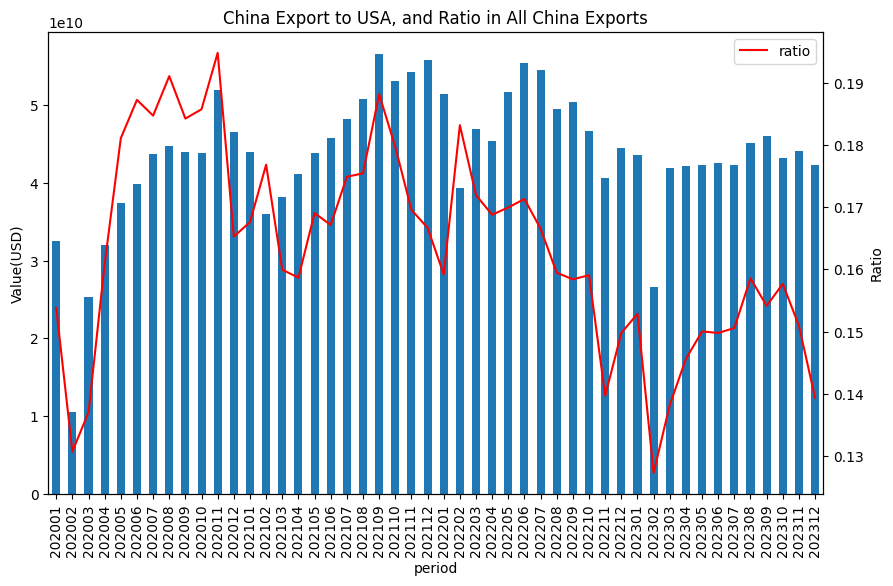

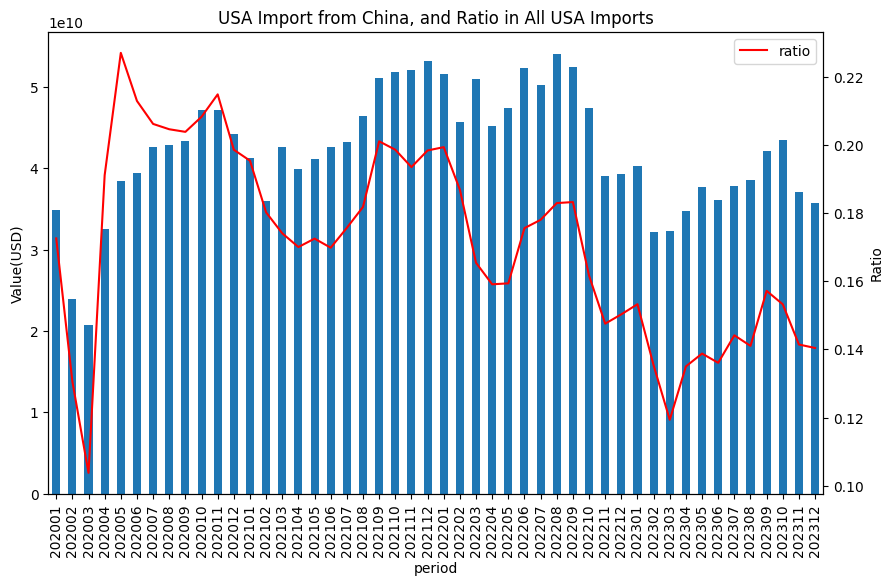

In [3]:
def calc_ratio(d, partnerCode):
    partnerdb = d[d['partnerCode'] == int(partnerCode)][['partnerISO', 'primaryValue','period', 'cmdCode', 'cmdDesc']]
    partnerdb.rename(columns={'primaryValue': 'value'}, inplace=True)
    worlddb = d[d['partnerCode'] == 0][['primaryValue','period']]
    worlddb.rename(columns={'primaryValue': 'worldvalue'}, inplace=True)
    dd = pd.merge(partnerdb,worlddb, on='period')
    dd['ratio'] = dd['value']/dd['worldvalue']
    dd.index=dd.period
    return dd
def plot_xport(d, partnerCode, title):
    dd = calc_ratio(d, partnerCode)
    (ax1, ax2) = plot_twins_ax('period', 'Value(USD)', 'Ratio')
    dd['value'].plot(kind='bar', ax=ax1)
    dd['ratio'].plot(ax=ax2,legend=True, color='r', title=title)

print('中国->美国 中国每月出口额 和占总出口额的比例')
df = comTrade.get_final_with_years(years, reporterCode=CHNCode, partnerCode=f'{WorldCode},{USACode}')
plot_xport(df[df['flowCode']=='X'], partnerCode=USACode, title="China Export to USA, and Ratio in All China Exports")

print('中国->美国 美国每月进口额 和占总进口额的比例')
df = comTrade.get_final_with_years(years, reporterCode=USACode, partnerCode=f'{WorldCode},{CHNCode}')
plot_xport(df[df['flowCode']=='M'], partnerCode=CHNCode, title="USA Import from China, and Ratio in All USA Imports")

中国出口美国前15名的货物类型， 2020年


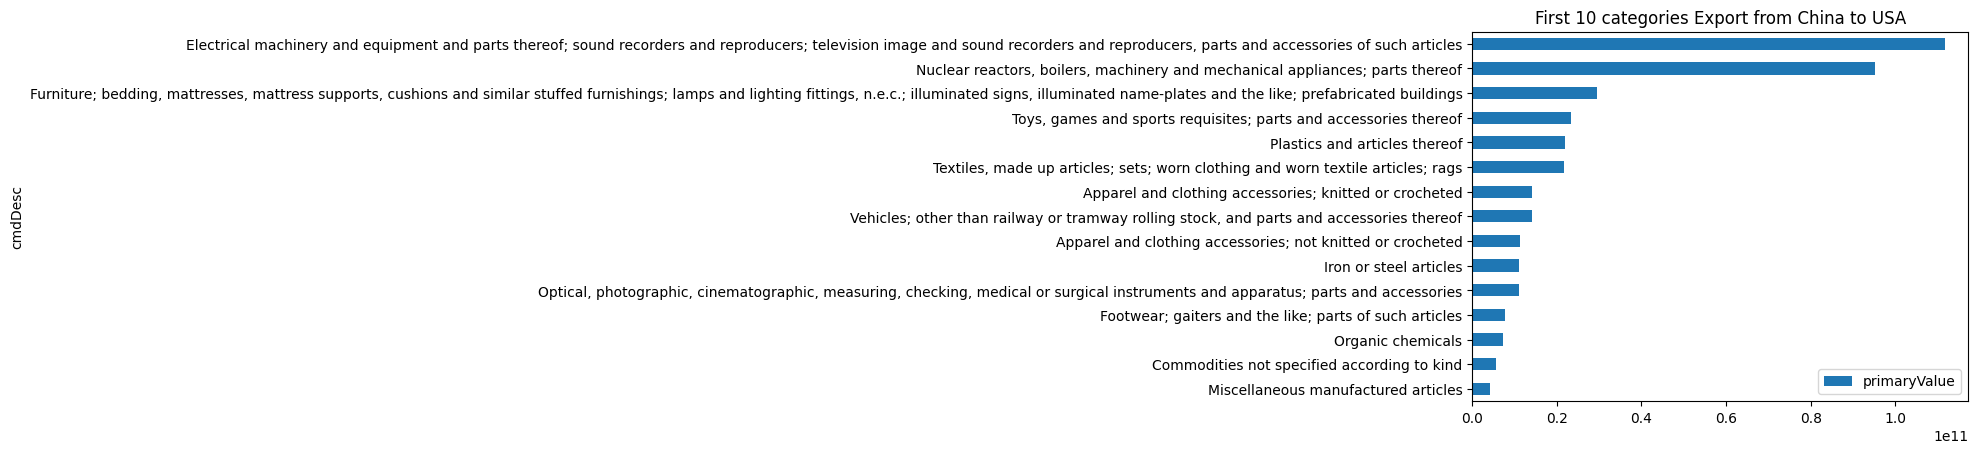

In [18]:
N=15
df = comTrade._get_final(years[0], reporterCode=CHNCode, partnerCode=USACode, cmdCode=None, flowCode='X', freqCode='A')
df = comTrade.filter_columns(df[df['aggrLevel']==2])
df = df.sort_values(by='primaryValue', ascending=False)
data = df.head(N)
ax = data.plot(kind='barh', x='cmdDesc', y='primaryValue', rot=0, title='First 10 categories Export from China to USA')
ax.invert_yaxis()  
print(f"中国出口美国前{N}名的货物类型， {years[0]}年")

In [5]:
year1 = str(years[0])
year2 = str(years[-1])
cmdArr = data['cmdCode'].tolist()
partnerCode = USACode
df = comTrade.get_final_with_years([year1, year2], reporterCode=CHNCode, partnerCode=f'{WorldCode},{USACode}', cmdArr=cmdArr, flowCode='X', freqCode='A')

ratio_db = pd.DataFrame()
for cmd in cmdArr:
    d = df[df['cmdCode'] == str(cmd)]
    dd = calc_ratio(d, partnerCode)
    diff = dd.loc[year2]['ratio'] - dd.loc[year1]['ratio']
    s= {f'ratio_{year1}':dd.loc[year1]['ratio'], f'ratio_{year2}':dd.loc[year2]['ratio'], 'cmdDesc':dd.iloc[0]['cmdDesc'], 'diff':diff}
    ratio_db = AppendSeries(ratio_db, pd.Series(s, name=cmd), ignore_index=False)
ratio_db = ratio_db.sort_values(by='diff')
print(f"{year1}-{year2} 比例下降最多的商品类型")
ratio_db

2020-2023 比例下降最多的商品类型


,ratio_2020,ratio_2023,cmdDesc,diff
87,0.184093,0.094873,Vehicles; other than railway or tramway rollin...,-0.08922
39,0.226664,0.176872,Plastics and articles thereof,-0.049792
84,0.216418,0.174258,"Nuclear reactors, boilers, machinery and mecha...",-0.042161
29,0.129705,0.095361,Organic chemicals,-0.034344
96,0.232052,0.201562,Miscellaneous manufactured articles,-0.030489
64,0.203706,0.178562,Footwear; gaiters and the like; parts of such ...,-0.025143
73,0.155602,0.135841,Iron or steel articles,-0.019761
85,0.157231,0.138913,Electrical machinery and equipment and parts t...,-0.018318
94,0.269946,0.252373,"Furniture; bedding, mattresses, mattress suppo...",-0.017573
61,0.227332,0.229669,Apparel and clothing accessories; knitted or c...,0.002337


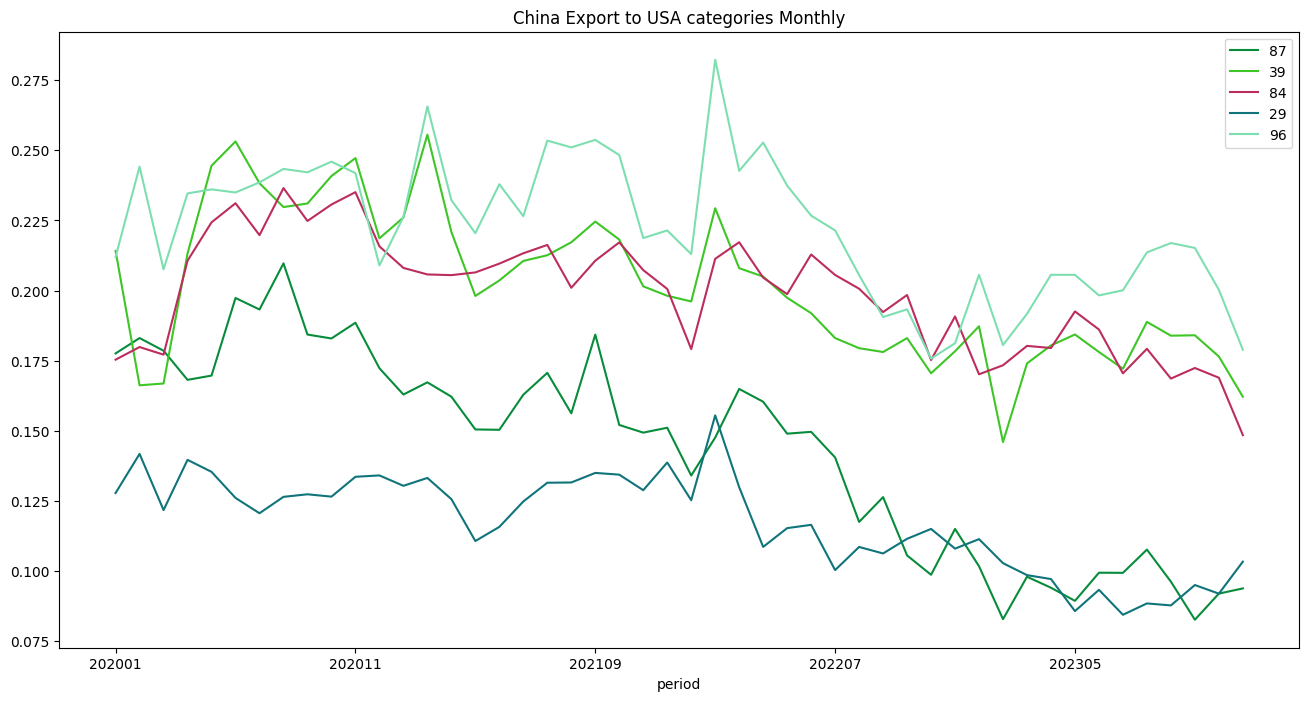

In [6]:
N = 5
cmdArr = ratio_db.head(N).index.tolist()
partnerCode = USACode
df = comTrade.get_final_with_years(years, reporterCode=CHNCode, partnerCode=f'{WorldCode},{USACode}', cmdArr=cmdArr, flowCode='X', freqCode='M')
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
for cmd in cmdArr:
    d = df[df['cmdCode'] == str(cmd)]
    dd = calc_ratio(d, partnerCode)
    dd[cmd]=dd['ratio']
    dd[cmd].plot(legend=True, color= random_color(), title='China Export to USA categories Monthly')
        

# 遗留问题和继续分析目标
## 1. 从美国进口数据确认是否符合？
## 2. 美国进口比例降低，是否是美国的供给短缺的主要原因？
## 3. 美国进口供给缺失的部分，是否有替代的国家补充？